In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def measure(clf,a,b):
    y_ps = cross_val_predict(clf, a, b, cv=3)
    print(classification_report(b, y_ps))

In [3]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X = mnist['data']
y = mnist['target']

X.shape, y.shape

((70000, 784), (70000,))

In [5]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test  = X[60000:], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# RandomForest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfg_clf = RandomForestClassifier(random_state=42)
x = rfg_clf.fit(X_train, y_train)
rfg_clf.predict(X_train)

array([ 7.,  1.,  0., ...,  7.,  3.,  6.])

In [8]:
measure(rfg_clf, X_train, y_train)

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      5923
        1.0       0.97      0.98      0.98      6742
        2.0       0.92      0.95      0.93      5958
        3.0       0.91      0.92      0.92      6131
        4.0       0.92      0.95      0.94      5842
        5.0       0.93      0.91      0.92      5421
        6.0       0.96      0.97      0.96      5918
        7.0       0.96      0.95      0.95      6265
        8.0       0.94      0.89      0.91      5851
        9.0       0.93      0.91      0.92      5949

avg / total       0.94      0.94      0.94     60000



In [9]:
y_ps = cross_val_predict(rfg_clf, X_train, y_train, cv=3)
matrix = confusion_matrix(y_train, y_ps)
matrix

array([[5797,    0,   23,    5,    5,   12,   35,    2,   40,    4],
       [   2, 6618,   39,   23,   14,   10,    6,   12,   13,    5],
       [  47,   23, 5635,   56,   43,   10,   33,   52,   53,    6],
       [  18,   18,  122, 5649,    9,  126,    8,   50,   95,   36],
       [  12,   12,   37,    5, 5546,   11,   32,   18,   28,  141],
       [  56,   23,   27,  192,   40, 4934,   57,    8,   49,   35],
       [  52,   14,   25,    2,   30,   59, 5718,    0,   16,    2],
       [  14,   34,   77,   24,   73,    5,    3, 5936,   14,   85],
       [  35,   60,   85,  137,   72,  103,   48,   14, 5223,   74],
       [  33,   15,   28,   93,  187,   37,    8,   78,   47, 5423]])

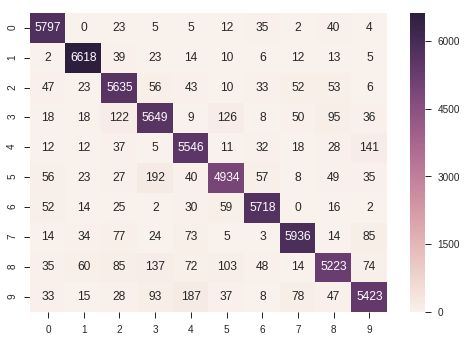

In [10]:
ax = sns.heatmap(matrix, annot=True, fmt="d")

In [13]:
cross_val_score(rfg_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.94081184,  0.93959698,  0.94354153])

# KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10)
X = knn_clf.fit(X_train, y_train)
knn_clf.predict(X_train)

array([ 7.,  1.,  0., ...,  7.,  3.,  6.])

In [15]:
measure(knn_clf, X_train, y_train)

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      5923
        1.0       0.94      0.99      0.97      6742
        2.0       0.98      0.95      0.97      5958
        3.0       0.96      0.96      0.96      6131
        4.0       0.98      0.96      0.97      5842
        5.0       0.96      0.96      0.96      5421
        6.0       0.97      0.99      0.98      5918
        7.0       0.95      0.97      0.96      6265
        8.0       0.99      0.91      0.95      5851
        9.0       0.94      0.95      0.95      5949

avg / total       0.96      0.96      0.96     60000



In [16]:
from sklearn.metrics import confusion_matrix
y_ps1 = cross_val_predict(knn_clf, X_train, y_train, cv=3)
matrix = confusion_matrix(y_train, y_ps1)
matrix

array([[5880,    6,    5,    1,    0,    6,   18,    3,    1,    3],
       [   1, 6703,   12,    1,    3,    0,    3,   13,    1,    5],
       [  58,   92, 5648,   15,    5,    5,   14,   93,   22,    6],
       [   9,   25,   40, 5890,    3,   52,    2,   42,   34,   34],
       [   5,   62,    2,    1, 5625,    0,   16,   12,    1,  118],
       [  18,   22,    5,   86,    7, 5178,   62,    8,    7,   28],
       [  27,   18,    1,    0,    3,   27, 5839,    0,    3,    0],
       [   4,   85,   10,    2,   16,    1,    0, 6080,    1,   66],
       [  26,   97,   18,  104,   34,   99,   33,   23, 5333,   84],
       [  16,   20,    5,   54,   57,   16,    4,  103,   11, 5663]])

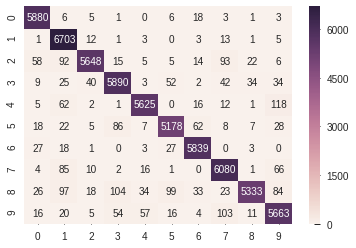

In [18]:
 ax = sns.heatmap(matrix, annot=True, fmt="d")

In [17]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.96430714,  0.96229811,  0.9653448 ])

# Naive bayes classifier

In [7]:
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()

In [8]:
X = GNB_clf.fit(X_train, y_train)
y = GNB_clf.predict(X_train)

In [11]:
y_ps2 = cross_val_predict(GNB_clf,X_train,y_train,cv=3)
GNB_matrix = confusion_matrix(y_train,y_ps2)
GNB_matrix

array([[5323,   12,   35,   18,   11,   16,  206,    5,  195,  102],
       [   3, 6360,   21,   41,    2,   16,   83,    4,  134,   78],
       [ 610,  189, 1706,  572,   30,   33, 1442,   17, 1261,   98],
       [ 426,  348,   56, 2497,   18,    9,  340,   47, 1728,  662],
       [ 183,   64,   46,   45,  986,   39,  548,   32, 1126, 2773],
       [ 709,  163,   32,  150,   31,  337,  302,   14, 3095,  588],
       [  64,  136,   31,    4,    6,   23, 5535,    0,  110,    9],
       [  33,   51,    9,   54,   61,    9,   14, 1933,  168, 3933],
       [ 110,  905,   20,   64,   25,   36,  135,    7, 3460, 1089],
       [  34,   55,   16,    7,   33,    6,    5,   87,  103, 5603]])

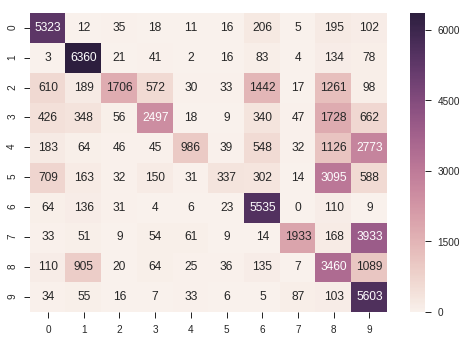

In [14]:
ax = sns.heatmap(GNB_matrix, annot=True, fmt="d")

In [ ]:
cross_val_score(GNB_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.54304139,  0.58267913,  0.56128419])

# SVM

In [ ]:
from sklearn import svm
svm_clf = svm.SVC()
x = svm_clf.fit(X_train,y_train)
y = svm_clf.predict(X_train)

In [ ]:
measure(svm_clf,X_train,y_train)

In [ ]:
y_ps3 = cross_val_predict(svm_clf,X_train,y_train,cv = 3)
svm_matrix = confusion_matrix(y_train,y_ps3)
svm_matrix

In [ ]:
ax = sns.heatmap(svm_matrix, annot=True)

In [ ]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

# Logistic Regression